![Pandas](http://pandas.pydata.org/_static/pandas_logo.png)

# <span style="color:blue">Week 12 - Pandas II</span>

## <span style="color:red">Today's Agenda</span>
- Useful functions when using Pandas 

# Review

See [Week 8](https://github.com/VandyAstroML/Vanderbilt_Computational_Bootcamp/blob/master/notebooks/Week_08/08_Pandas.ipynb) for a review on Pandas 

# RESOLVE Dataset

Today we'll be using a dataset by the [Resolve](https://resolve.astro.unc.edu/) Survey. RESOLVE is a volume-limited census of stellar, gas, and dynamical mass as well as star formation and merging within >50,000 cubic Mpc of the nearby cosmic web, reaching down to the dwarf galaxy regime and up to structures on tens of Mpc scales such as filaments, walls, and voids.

In [1]:
# Importing modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_context("notebook")

First, we need to read in the data from RESOLVE.

In [2]:
## Reading in data
# Column Names
colnames = ['RA','DEC','CZobs','Mr','HaloID','logMHalo',
            'NGalH','FLAG','CZreal','DISTC','Vptot',
            'Vptang','Morph','logMstar','rmag','umag',
            'FSMGR','GalMatchFlag','ur_col','MhiMass','GroupID',
            'GroupNGals','GroupRproj','GroupCZdisp',
            'GroupLogMHalo','GroupGalType']

# We use `pd.read_csv` to read CSV files
# The argument in `sep`, i.e. "\s+" tells pandas to read white spaces
RS = pd.read_csv('./data/Resolve_Catalogue.dat',
                      sep='\s+', 
                      skiprows=2, 
                      names=colnames)

In [3]:
RS.head()

,RA,DEC,CZobs,Mr,HaloID,logMHalo,NGalH,FLAG,CZreal,DISTC,...,FSMGR,GalMatchFlag,ur_col,MhiMass,GroupID,GroupNGals,GroupRproj,GroupCZdisp,GroupLogMHalo,GroupGalType
0,222.361029,13.152031,7462.85561,-21.264,198732,15.141,469,0,9255.587090,1.098726,...,0.200007,ECO,2.091679,2.041738e+09,0,1,0.000000,0.00,12.225,1
1,222.808069,12.397480,7396.39554,-22.864,198732,15.141,469,0,9313.492255,1.300715,...,0.089128,ECO,2.181833,8.912519e+09,1,1,0.000000,0.00,13.172,1
2,222.219307,12.979642,6653.37177,-19.477,198732,15.141,469,0,9293.469960,0.802355,...,0.133072,ECO,2.220791,3.548133e+08,2,18,0.240688,277.11,13.621,0
3,222.153140,13.081357,5945.69782,-20.666,198732,15.141,469,0,9292.222436,1.018345,...,0.372099,ECO,1.339117,8.511383e+09,3,1,0.000000,0.00,11.989,1
4,222.540987,12.821932,6795.38705,-21.867,198732,15.141,469,0,9288.730044,0.404541,...,0.368589,ECO,1.815042,2.137960e+09,4,5,0.154728,235.29,13.138,1


In [4]:
RS.shape

(5080, 26)

Let's show some plots for this dataset

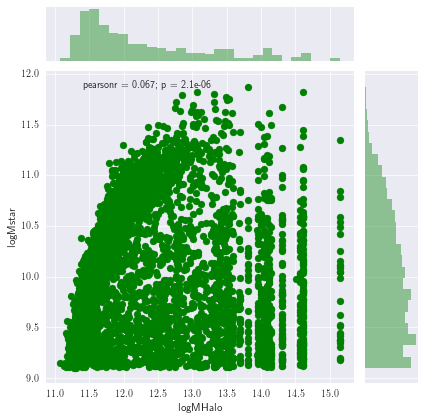

In [5]:
sns.jointplot("logMHalo","logMstar",data=RS, color='green')

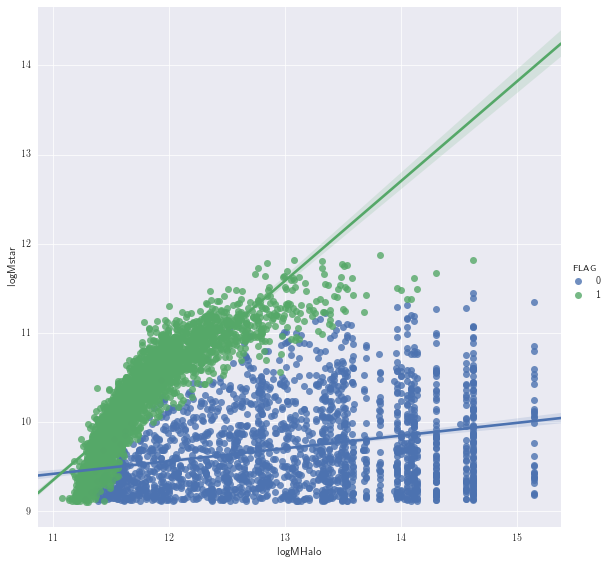

In [6]:
g = sns.lmplot(x="logMHalo", y="logMstar", hue="FLAG", data=RS, size=8)

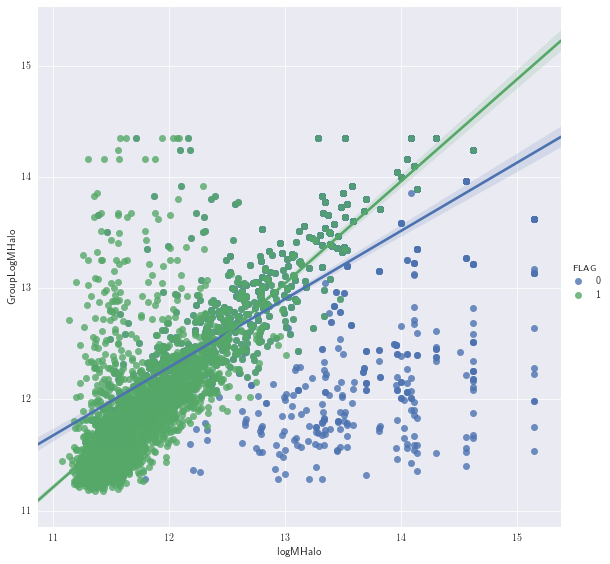

In [7]:
sns.lmplot(x="logMHalo", y="GroupLogMHalo", hue="FLAG", data=RS, size=8)

Now that we have looked at some of the data, calculating some 
statistics for it.
Let's first create a subsample of the dataset

In [31]:
RS1 = RS.loc[ (RS.logMHalo >= 11) & (RS.logMHalo <= 12)]
print(RS1.shape)

# Resetting Indices
RS1.reset_index(inplace=True)

RS1.head()

(2730, 26)


,index,RA,DEC,CZobs,Mr,HaloID,logMHalo,NGalH,FLAG,CZreal,...,FSMGR,GalMatchFlag,ur_col,MhiMass,GroupID,GroupNGals,GroupRproj,GroupCZdisp,GroupLogMHalo,GroupGalType
0,32,134.634782,-0.513661,2560.74945,-19.378,281739,11.606,1,1,2389.978581,...,0.462300,ECO,1.659651,2.570394e+09,11,1,0.000000,0.00,11.512,1
1,36,135.134024,46.477611,3658.44177,-20.172,282776,11.675,1,1,4155.831904,...,1.293450,ECO,1.210722,9.332556e+09,14,1,0.000000,0.00,11.801,1
2,37,135.812900,46.573182,3503.62320,-18.793,282779,11.360,1,1,4126.863319,...,0.752197,ECO,1.395662,2.951213e+09,15,2,0.090258,73.24,12.077,0
3,38,135.791237,46.371980,3608.43558,-20.721,282781,11.892,1,1,4136.444575,...,0.514906,ECO,1.762735,2.454707e+09,15,2,0.090258,73.24,12.077,1
4,39,141.414228,47.734262,3592.98311,-19.252,283291,11.806,3,0,4055.758985,...,1.687002,ECO,1.203329,3.548138e+09,16,3,0.054441,14.31,12.221,0


### Map

You can use the `unique` function to map some function or apply some 
mask to your data.

Let's say I want to convert `RA` and `DEC` to radians.

In [54]:
RS1.loc[:,'RArad' ] = RS1.RA.map( lambda x: np.radians(x))
RS1.loc[:,'DECrad'] = RS1.DEC.map(lambda x: np.radians(x))
RS1[['RA','RArad','DEC','DECrad']].head()

,RA,RArad,DEC,DECrad
0,134.634782,2.349820,-0.513661,-0.008965
1,135.134024,2.358534,46.477611,0.811187
2,135.812900,2.370382,46.573182,0.812855
3,135.791237,2.370004,46.371980,0.809344
4,141.414228,2.468144,47.734262,0.833120


## apply

The apply is a function that _applies_ a function along 
axis of the DataFrame

In [58]:
RS1.loc[:,'RArad'].apply(np.degrees)
RS1['RArad'].head()

0    2.349820
1    2.358534
2    2.370382
3    2.370004
4    2.468144
Name: RArad, dtype: float64

### Unique

The `unique` function will return unique entries for a specified column.
This is analogous to the `np.unique` function from `NumPy`.

In [10]:
# Obtaining unique list of `HaloID`
print(RS1['HaloID'].shape)
RS1['HaloID'].head()

(2730,)


0    281739
1    282776
2    282779
3    282781
4    283291
Name: HaloID, dtype: int64

__Number of unique__ elements in `HaloID`

In [11]:
HaloID_unq = RS1.HaloID.unique()
HaloID_unq.shape

(2405,)

In [12]:
HaloID_unq

array([ 281739,  282776,  282779, ..., 1769274, 1769811, 1769883])

## In-place Plotting

You can also plot distributions, x-y plots, etc using Pandas.
Let's plot the distribution of `logMstar`.

See more here: [http://pandas.pydata.org/pandas-docs/stable/visualization.html](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

## Group by

This is a really useful function in Pandas.
It allows you to group your data set into `groups`, and returns them 
as dictionaries

In [20]:
RS1.head()

,index,RA,DEC,CZobs,Mr,HaloID,logMHalo,NGalH,FLAG,CZreal,...,ur_col,MhiMass,GroupID,GroupNGals,GroupRproj,GroupCZdisp,GroupLogMHalo,GroupGalType,RArad,DECrad
0,32,134.634782,-0.513661,2560.74945,-19.378,281739,11.606,1,1,2389.978581,...,1.659651,2.570394e+09,11,1,0.000000,0.00,11.512,1,2.349820,-0.008965
1,36,135.134024,46.477611,3658.44177,-20.172,282776,11.675,1,1,4155.831904,...,1.210722,9.332556e+09,14,1,0.000000,0.00,11.801,1,2.358534,0.811187
2,37,135.812900,46.573182,3503.62320,-18.793,282779,11.360,1,1,4126.863319,...,1.395662,2.951213e+09,15,2,0.090258,73.24,12.077,0,2.370382,0.812855
3,38,135.791237,46.371980,3608.43558,-20.721,282781,11.892,1,1,4136.444575,...,1.762735,2.454707e+09,15,2,0.090258,73.24,12.077,1,2.370004,0.809344
4,39,141.414228,47.734262,3592.98311,-19.252,283291,11.806,3,0,4055.758985,...,1.203329,3.548138e+09,16,3,0.054441,14.31,12.221,0,2.468144,0.833120


Let's group data by the `GroupID`

In [25]:
Groups_dict = RS1.groupby('GroupID')
Groups_dict

You can calcualte the `sum` of all columns, even though sometimes it 
would not make sense to do it

In [27]:
Groups_dict.sum()

,index,RA,DEC,CZobs,Mr,HaloID,logMHalo,NGalH,FLAG,CZreal,...,FSMGR,ur_col,MhiMass,GroupNGals,GroupRproj,GroupCZdisp,GroupLogMHalo,GroupGalType,RArad,DECrad
GroupID,,,,,,,,,,,,,,,,,,,,,
2,1376,221.840954,13.170086,6471.97371,-20.334,329126,11.902,1,1,6718.518758,...,0.140674,1.980040,1.412539e+09,18,0.240688,277.11,13.621,0,3.871855,0.229861
11,32,134.634782,-0.513661,2560.74945,-19.378,281739,11.606,1,1,2389.978581,...,0.462300,1.659651,2.570394e+09,1,0.000000,0.00,11.512,1,2.349820,-0.008965
14,36,135.134024,46.477611,3658.44177,-20.172,282776,11.675,1,1,4155.831904,...,1.293450,1.210722,9.332556e+09,1,0.000000,0.00,11.801,1,2.358534,0.811187
15,75,271.604137,92.945162,7112.05878,-39.514,565560,23.252,2,2,8263.307894,...,1.267103,3.158397,5.405920e+09,4,0.180516,146.48,24.154,1,4.740386,1.622199
16,120,424.030674,142.999764,10817.20762,-59.562,849873,35.418,9,1,12174.507866,...,3.244401,5.414899,8.241571e+09,9,0.163323,42.93,36.663,1,7.400731,2.495817
17,85,313.547838,32.546649,5204.49813,-39.424,567438,23.460,4,1,5596.463143,...,6.690735,3.393892,1.044847e+10,4,0.002866,71.72,23.856,1,5.472442,0.568046
18,89,281.848772,91.648853,7269.08157,-39.732,567674,23.530,4,1,8135.351431,...,0.493270,3.312586,1.028967e+10,4,0.134670,99.96,24.118,1,4.919189,1.599574
19,46,157.586636,48.572398,3573.40651,-19.150,284054,11.680,1,1,3967.525066,...,0.814564,1.449894,2.454705e+09,1,0.000000,0.00,11.429,1,2.750406,0.847748
20,47,140.765926,1.976329,2868.57700,-19.408,284061,11.420,1,1,2872.762118,...,0.122841,2.304186,3.890450e+08,1,0.000000,0.00,11.529,1,2.456829,0.034493


You can also get back a particular group

In [48]:
# Group with the most number of Galaxies
GroupID_max = int(RS1.GroupID.loc[RS1.GroupNGals==RS1.GroupNGals.max()].unique())

# Getting the stats for that Group
Groups_dict.get_group(GroupID_max)

,CZobs,CZreal,DEC,DECrad,DISTC,FLAG,FSMGR,GalMatchFlag,GroupCZdisp,GroupGalType,...,RA,RArad,Vptang,Vptot,index,logMHalo,logMstar,rmag,umag,ur_col
244,4184.84668,4433.164364,4.731734,0.082584,0.000000,1,2.215381,ECO,706.91,0,...,212.719898,3.712663,627.97968,675.29264,538,11.628,10.032284,-20.288746,-19.064381,1.224365
410,4924.61353,5034.595634,4.314873,0.075309,0.000000,1,0.442543,ECO,706.91,0,...,214.448100,3.742825,553.74793,564.56429,778,11.941,10.599734,-19.646400,-17.251831,2.394569
413,4882.03830,4945.885136,4.393863,0.076687,0.000000,1,0.203016,ECO,706.91,0,...,213.896606,3.733200,464.00287,468.37493,801,11.578,10.293238,-18.854952,-16.671577,2.183374
501,4472.13537,5202.238398,4.334079,0.075644,0.000000,1,6.603787,ECO,706.91,0,...,214.155222,3.737714,323.99750,798.76455,1284,11.715,10.287772,-19.358240,-18.197712,1.160528
502,4405.21117,5201.404801,4.379168,0.076431,0.072612,0,0.241837,ECO,706.91,0,...,214.123053,3.737152,287.37216,846.46739,1285,11.715,9.280000,-19.149672,-17.523731,1.625940


You can compute different statistics for the different columns

In [49]:
Groups_dict.get_group(GroupID_max).describe()

,CZobs,CZreal,DEC,DECrad,DISTC,FLAG,FSMGR,GroupCZdisp,GroupGalType,GroupLogMHalo,...,RA,RArad,Vptang,Vptot,index,logMHalo,logMstar,rmag,umag,ur_col
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00,5.0,5.00,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,4573.769010,4963.457667,4.430743,0.077331,0.014522,0.800000,1.941313,706.91,0.0,14.35,...,213.868576,3.732711,451.420028,670.692760,937.200000,11.715400,10.098606,-19.459602,-17.741846,1.717755
std,319.422742,316.312926,0.171308,0.002990,0.032473,0.447214,2.737242,0.00,0.0,0.00,...,0.671383,0.011718,145.731638,157.730799,333.350716,0.139116,0.499827,0.546421,0.920608,0.556157
min,4184.846680,4433.164364,4.314873,0.075309,0.000000,0.000000,0.203016,706.91,0.0,14.35,...,212.719898,3.712663,287.372160,468.374930,538.000000,11.578000,9.280000,-20.288746,-19.064381,1.160528
25%,4405.211170,4945.885136,4.334079,0.075644,0.000000,1.000000,0.241837,706.91,0.0,14.35,...,213.896606,3.733200,323.997500,564.564290,778.000000,11.628000,10.032284,-19.646400,-18.197712,1.224365
50%,4472.135370,5034.595634,4.379168,0.076431,0.000000,1.000000,0.442543,706.91,0.0,14.35,...,214.123053,3.737152,464.002870,675.292640,801.000000,11.715000,10.287772,-19.358240,-17.523731,1.625940
75%,4882.038300,5201.404801,4.393863,0.076687,0.000000,1.000000,2.215381,706.91,0.0,14.35,...,214.155222,3.737714,553.747930,798.764550,1284.000000,11.715000,10.293238,-19.149672,-17.251831,2.183374
max,4924.613530,5202.238398,4.731734,0.082584,0.072612,1.000000,6.603787,706.91,0.0,14.35,...,214.448100,3.742825,627.979680,846.467390,1285.000000,11.941000,10.599734,-18.854952,-16.671577,2.394569


## Covariance

Or even calculate the covariance for the columns

In [60]:
RS1.cov()

,index,RA,DEC,CZobs,Mr,HaloID,logMHalo,NGalH,FLAG,CZreal,...,ur_col,MhiMass,GroupID,GroupNGals,GroupRproj,GroupCZdisp,GroupLogMHalo,GroupGalType,RArad,DECrad
index,2.181596e+06,-2.298427e+04,5.586957e+03,7.772780e+05,1.931854e+01,6.154578e+08,-1.441836e+01,-2.628546e+01,8.913818e+00,8.106301e+05,...,2.619069e+01,-2.665743e+11,1.311627e+06,-8.450746e+02,-8.782327e+00,-1.349381e+04,-8.693728e+01,5.784895e+01,-4.011512e+02,9.751079e+01
RA,-2.298427e+04,1.089537e+03,-3.420840e+01,2.757614e+03,-2.955545e-01,-6.679839e+06,1.474443e-01,-2.572352e-01,1.350572e-01,1.508786e+03,...,-4.593881e-02,6.882014e+08,-1.330206e+04,1.396574e+01,1.476375e-01,2.422790e+02,1.521332e+00,-8.423405e-01,1.901602e+01,-5.970492e-01
DEC,5.586957e+03,-3.420840e+01,2.319493e+02,-2.092093e+03,1.229002e-02,3.753073e+06,-2.776626e-02,2.496057e-01,-7.613347e-02,-1.448510e+03,...,-7.458507e-04,-5.427480e+08,3.905507e+03,-6.081837e+00,-1.928684e-02,-8.218754e+01,-4.941584e-01,2.200978e-01,-5.970492e-01,4.048280e+00
CZobs,7.772780e+05,2.757614e+03,-2.092093e+03,1.654774e+06,-2.310160e+01,1.476149e+08,9.432305e+00,-4.304231e+00,-1.158965e+00,1.575706e+06,...,3.806679e+01,-1.371571e+11,4.454930e+05,-2.168341e+02,-9.466808e-01,-2.640655e+03,1.055219e+01,-1.348847e-01,4.812945e+01,-3.651391e+01
Mr,1.931854e+01,-2.955545e-01,1.229002e-02,-2.310160e+01,3.456844e-01,2.438294e+03,-7.860392e-02,-4.982106e-03,-2.889540e-02,-2.440613e+01,...,-7.208798e-02,-4.127290e+08,1.591201e+01,6.463370e-03,-1.080272e-03,-1.447294e+00,-1.095948e-01,-4.498804e-02,-5.158399e-03,2.145012e-04
HaloID,6.154578e+08,-6.679839e+06,3.753073e+06,1.476149e+08,2.438294e+03,2.304506e+11,-2.017190e+03,2.410209e+02,-4.727293e+01,1.623230e+08,...,1.829660e+03,-5.093372e+13,3.804580e+08,-2.043365e+05,-1.349997e+03,-3.194161e+06,-1.997173e+04,1.213782e+04,-1.165852e+05,6.550347e+04
logMHalo,-1.441836e+01,1.474443e-01,-2.776626e-02,9.432305e+00,-7.860392e-02,-2.017190e+03,4.046042e-02,3.145101e-02,-1.402054e-02,9.859384e+00,...,1.709318e-02,8.438130e+07,-1.129491e+01,6.450592e-02,1.211647e-03,1.595945e+00,3.725773e-02,-9.509890e-03,2.573389e-03,-4.846127e-04
NGalH,-2.628546e+01,-2.572352e-01,2.496057e-01,-4.304231e+00,-4.982106e-03,2.410209e+02,3.145101e-02,2.507830e-01,-1.088891e-01,-7.419269e+00,...,5.959124e-03,-1.206168e+07,-1.685324e+01,2.462191e-01,4.749852e-03,6.838984e+00,6.283496e-02,-9.178099e-02,-4.489601e-03,4.356440e-03
FLAG,8.913818e+00,1.350572e-01,-7.613347e-02,-1.158965e+00,-2.889540e-02,-4.727293e+01,-1.402054e-02,-1.088891e-01,1.065840e-01,-2.967087e-01,...,2.494139e-03,6.993297e+07,6.058182e+00,-1.120744e-01,-2.192924e-03,-3.117333e+00,-2.805117e-02,7.410140e-02,2.357192e-03,-1.328780e-03
CZreal,8.106301e+05,1.508786e+03,-1.448510e+03,1.575706e+06,-2.440613e+01,1.623230e+08,9.859384e+00,-7.419269e+00,-2.967087e-01,1.536303e+06,...,3.694438e+01,-1.332002e+11,4.676088e+05,-1.325822e+02,-2.442582e-01,-2.289977e+03,1.287176e+01,-6.949726e-01,2.633328e+01,-2.528127e+01


## Correlation

The `corr` method provides the correlation between columns

In [61]:
RS1.corr()

,index,RA,DEC,CZobs,Mr,HaloID,logMHalo,NGalH,FLAG,CZreal,...,ur_col,MhiMass,GroupID,GroupNGals,GroupRproj,GroupCZdisp,GroupLogMHalo,GroupGalType,RArad,DECrad
index,1.000000,-0.471436,0.248366,0.409091,0.022246,0.868005,-0.048530,-0.035537,0.018485,0.442789,...,0.039165,-0.045595,0.994961,-0.093777,-0.116307,-0.156689,-0.139040,0.095023,-0.471436,0.248366
RA,-0.471436,1.000000,-0.068048,0.064945,-0.015229,-0.421557,0.022207,-0.015562,0.012533,0.036878,...,-0.003074,0.005267,-0.451524,0.069347,0.087490,0.125888,0.108874,-0.061913,1.000000,-0.068048
DEC,0.248366,-0.068048,1.000000,-0.106786,0.001373,0.513336,-0.009064,0.032727,-0.015312,-0.076734,...,-0.000108,-0.009003,0.287319,-0.065452,-0.024771,-0.092555,-0.076646,0.035062,-0.068048,1.000000
CZobs,0.409091,0.064945,-0.106786,1.000000,-0.030544,0.239041,0.036453,-0.006682,-0.002760,0.988251,...,0.065360,-0.026936,0.388020,-0.027628,-0.014395,-0.035207,0.019377,-0.000254,0.064945,-0.106786
Mr,0.022246,-0.015229,0.001373,-0.030544,1.000000,0.008639,-0.664644,-0.016921,-0.150537,-0.033490,...,-0.270806,-0.177340,0.030323,0.001802,-0.035940,-0.042219,-0.440324,-0.185642,-0.015229,0.001373
HaloID,0.868005,-0.421557,0.513336,0.239041,0.008639,1.000000,-0.020890,0.001003,-0.000302,0.272805,...,0.008418,-0.026804,0.887975,-0.069766,-0.055008,-0.114119,-0.098276,0.061344,-0.421557,0.513336
logMHalo,-0.048530,0.022207,-0.009064,0.036453,-0.664644,-0.020890,1.000000,0.312227,-0.213503,0.039545,...,0.187691,0.105977,-0.062914,0.052562,0.117827,0.136080,0.437545,-0.114704,0.022207,-0.009064
NGalH,-0.035537,-0.015562,0.032727,-0.006682,-0.016921,0.001003,0.312227,1.000000,-0.666023,-0.011953,...,0.026283,-0.006085,-0.037707,0.080586,0.185531,0.234225,0.296397,-0.444654,-0.015562,0.032727
FLAG,0.018485,0.012533,-0.015312,-0.002760,-0.150537,-0.000302,-0.213503,-0.666023,1.000000,-0.000733,...,0.016874,0.054115,0.020791,-0.056266,-0.131390,-0.163768,-0.202968,0.550679,0.012533,-0.015312
CZreal,0.442789,0.036878,-0.076734,0.988251,-0.033490,0.272805,0.039545,-0.011953,-0.000733,1.000000,...,0.065833,-0.027149,0.422695,-0.017532,-0.003855,-0.031687,0.024531,-0.001360,0.036878,-0.076734


## Handling Missing Values

You can handle missing values in DataFrames without a problem.

Check "[Handling of missing values](http://pandas.pydata.org/pandas-docs/dev/missing_data.html#missing-data-basics)" to learn more about this.

### Drop missing values

For this example, we'll use a new DataFrame

In [63]:
df = pd.DataFrame({'int_col' : [1,2,6,8,-1], 'float_col' : [0.1, 0.2,0.2,10.1,None], 'str_col' : ['a','b',None,'c','a']})
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


We can use the `dropna` function to drop NaN numbers

In [66]:
df.dropna()

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
3,10.1,8,c


### Fill missing values

The `fillna` method can be used to fill missing data (NaN).
This example will replae the missing values with the _mean_ of the available values.

In [67]:
df3 = df.copy()

mean = df3['float_col'].mean()

df3

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [68]:
df3['float_col'].fillna(mean)

0     0.10
1     0.20
2     0.20
3    10.10
4     2.65
Name: float_col, dtype: float64

In [69]:
df3

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


# Resources
- [http://dataconomy.com/2015/03/14-best-python-pandas-features/](http://dataconomy.com/2015/03/14-best-python-pandas-features/)
- [http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/](http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/)